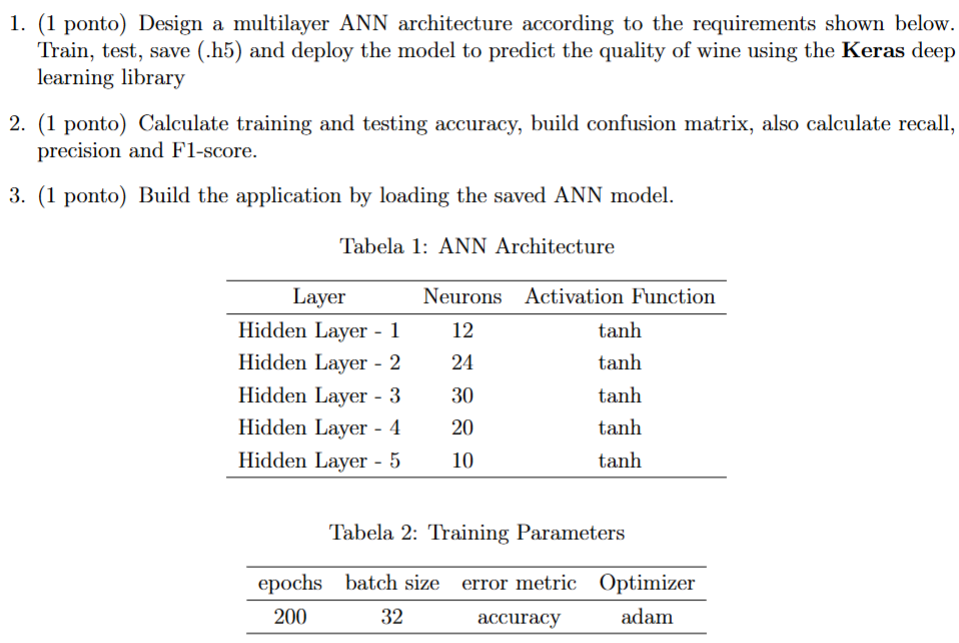

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv('/content/winequality-red.csv')
X, y = data.iloc[:, :-1].to_numpy(), data.iloc[:, -1].to_numpy()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def wine_quality_model(input_shape):
    model = Sequential([
        Dense(12, activation='tanh', input_shape=(input_shape,)),
        Dense(24, activation='tanh'),
        Dense(30, activation='tanh'),
        Dense(20, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    return model

model = wine_quality_model(X_train.shape[1])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=200, batch_size=32, verbose=1)

model.save("wine_quality_model.h5")

train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

loaded_model = tf.keras.models.load_model("wine_quality_model.h5")

new_data = np.array([list(map(float, input().split()))])
new_data_scaled = scaler.transform(new_data)
predicted_result = loaded_model.predict(new_data_scaled)

print("Predicted Wine Quality (0: Bad, 1: Good):", int(predicted_result[0][0] > 0.5))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0000e+00 - loss: -0.4500 - val_accuracy: 0.0000e+00 - val_loss: -7.2928
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -10.2220 - val_accuracy: 0.0000e+00 - val_loss: -18.8557
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -20.2491 - val_accuracy: 0.0000e+00 - val_loss: -23.9933
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: -24.3148 - val_accuracy: 0.0000e+00 - val_loss: -27.1925
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: -27.4798 - val_accuracy: 0.0000e+00 - val_loss: -29.9439
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: -30.1615 - val_accuracy: 0.0000e+00 - val_loss: -32.4824
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -32.3938 - val_accuracy: 0.0000e+00 - val_loss: -34.9027
Epoch 8/200
40/40 ━━━━━━━━━━

Train Accuracy: 0.0
Test Accuracy: 0.0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 6  0  0  0  0  0]
 [66  0  0  0  0  0]
 [66  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 3  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       6.0
           5       0.00      0.00      0.00      66.0
           6       0.00      0.00      0.00      66.0
           7       0.00      0.00      0.00      19.0
           8       0.00      0.00      0.00       3.0

    accuracy                           0.00     160.0
   macro avg       0.00      0.00      0.00     160.0
weighted avg       0.00      0.00      0.00     160.0

7.0 0.27 0.36 20.7 0.045 45.0 170.0 1.001 3.00 0.45 8.4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted Wine Quality (0: Bad, 1: Good): 1
